### Black–Litterman Model for Asset Allocation

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt as pyp
import seaborn as sns
import datetime
import yfinance as yf
idx = pd.IndexSlice

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [36]:
# read market capitalization and ticker details
mcap = pd.read_csv('mcap.csv')
mcap.head(2)

,Tickers,MarketCap
0,RELIANCE,1.680000e+13
1,TCS,1.290000e+13


In [37]:
# create the tickers list
tickers = [ticker[:-3] for ticker in mcap.Tickers]
print(tickers)

['RELIA', '', 'HDFCB', 'I', 'ICICIB', 'HINDUNI', 'S', 'BHARTIA', 'H', 'KOTAKB', '', 'AXISB', '', 'BAJFINA', 'MAR', 'ASIANPA', 'NESTLE', 'TI', 'ULTRACE', 'POWERG', 'WI', 'JSWST', 'SUNPHA', 'HCLT', 'ADANIPO', 'GRA', 'DIVIS', 'SBIL', 'B', '', 'SHREE', 'COALIN', 'ADANIGR', 'ADANIPO', 'BRITAN', 'CI', 'TE', 'HEROMOT', 'DRRE', 'EICHER', 'G', '', '', 'INDUSIN', 'TATAMOT']


In [38]:
# Read daily prices from csv
prices = pd.read_csv('prices.csv', index_col=[0], parse_dates=[0])
prices.head(2)

,RELIANCE,TCS,HDFCBANK,INFY,ICICIBANK,HINDUNILVR,SBIN,BHARTIARTL,KOTAKBANK,LT,...,CIPLA,TECHM,HEROMOTOCO,DRREDDY,EICHERMOT,GAIL,UPL,IOC,INDUSINDBK,TATAMOTORS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+05:30,672.970398,2010.579224,1227.428711,655.615356,518.854004,1789.385864,314.799194,436.938934,1669.007446,1195.268677,...,458.291138,650.002258,2058.496094,520.994995,2115.296387,61.867901,556.839233,56.667076,1433.394531,183.311234
2020-01-02 00:00:00+05:30,684.427429,2001.349609,1235.252563,653.702332,522.575623,1790.771729,319.364197,438.770355,1666.514893,1227.524048,...,455.979919,653.371277,2055.872559,518.371277,2069.786621,63.067497,563.654846,57.139492,1476.561646,192.553818


In [39]:
# create market cap dict
mcap_dict = {ticker[:-3] : cap for ticker, cap in zip(mcap['Tickers'].values, mcap['MarketCap'].values)}
print(mcap_dict)

{'RELIA': np.float64(16800000000000.0), '': np.float64(1750000000000.0), 'HDFCB': np.float64(12900000000000.0), 'I': np.float64(6890000000000.0), 'ICICIB': np.float64(8790000000000.0), 'HINDUNI': np.float64(5230000000000.0), 'S': np.float64(6510000000000.0), 'BHARTIA': np.float64(9930000000000.0), 'H': np.float64(nan), 'KOTAKB': np.float64(3840000000000.0), 'AXISB': np.float64(3170000000000.0), 'BAJFINA': np.float64(5170000000000.0), 'MAR': np.float64(3660000000000.0), 'ASIANPA': np.float64(2190000000000.0), 'NESTLE': np.float64(2170000000000.0), 'TI': np.float64(2700000000000.0), 'ULTRACE': np.float64(3010000000000.0), 'POWERG': np.float64(2490000000000.0), 'WI': np.float64(2900000000000.0), 'JSWST': np.float64(2490000000000.0), 'SUNPHA': np.float64(3970000000000.0), 'HCLT': np.float64(4250000000000.0), 'ADANIPO': np.float64(1960000000000.0), 'GRA': np.float64(1620000000000.0), 'DIVIS': np.float64(1480000000000.0), 'SBIL': np.float64(1420000000000.0), 'B': np.float64(1140000000000.0),

### Construct the prior - Implied market returns

In [40]:
market_prices = yf.download("^NSEI", start="2020-01-01", end="2025-01-01")["Close"]
print(market_prices.head(2))

[*********************100%***********************]  1 of 1 completed

Ticker             ^NSEI
Date                    
2020-01-01  12182.500000
2020-01-02  12282.200195


In [41]:
# calculate asset covariance and delta
# market-implied risk premium, which is the market’s excess return divided by its variance
S = pyp.risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = pyp.black_litterman.market_implied_risk_aversion(market_prices, risk_free_rate=0.05796)
print(delta)

2.6207107884395775


Text(0.5, 1.0, 'Assets Correlation Matrix')

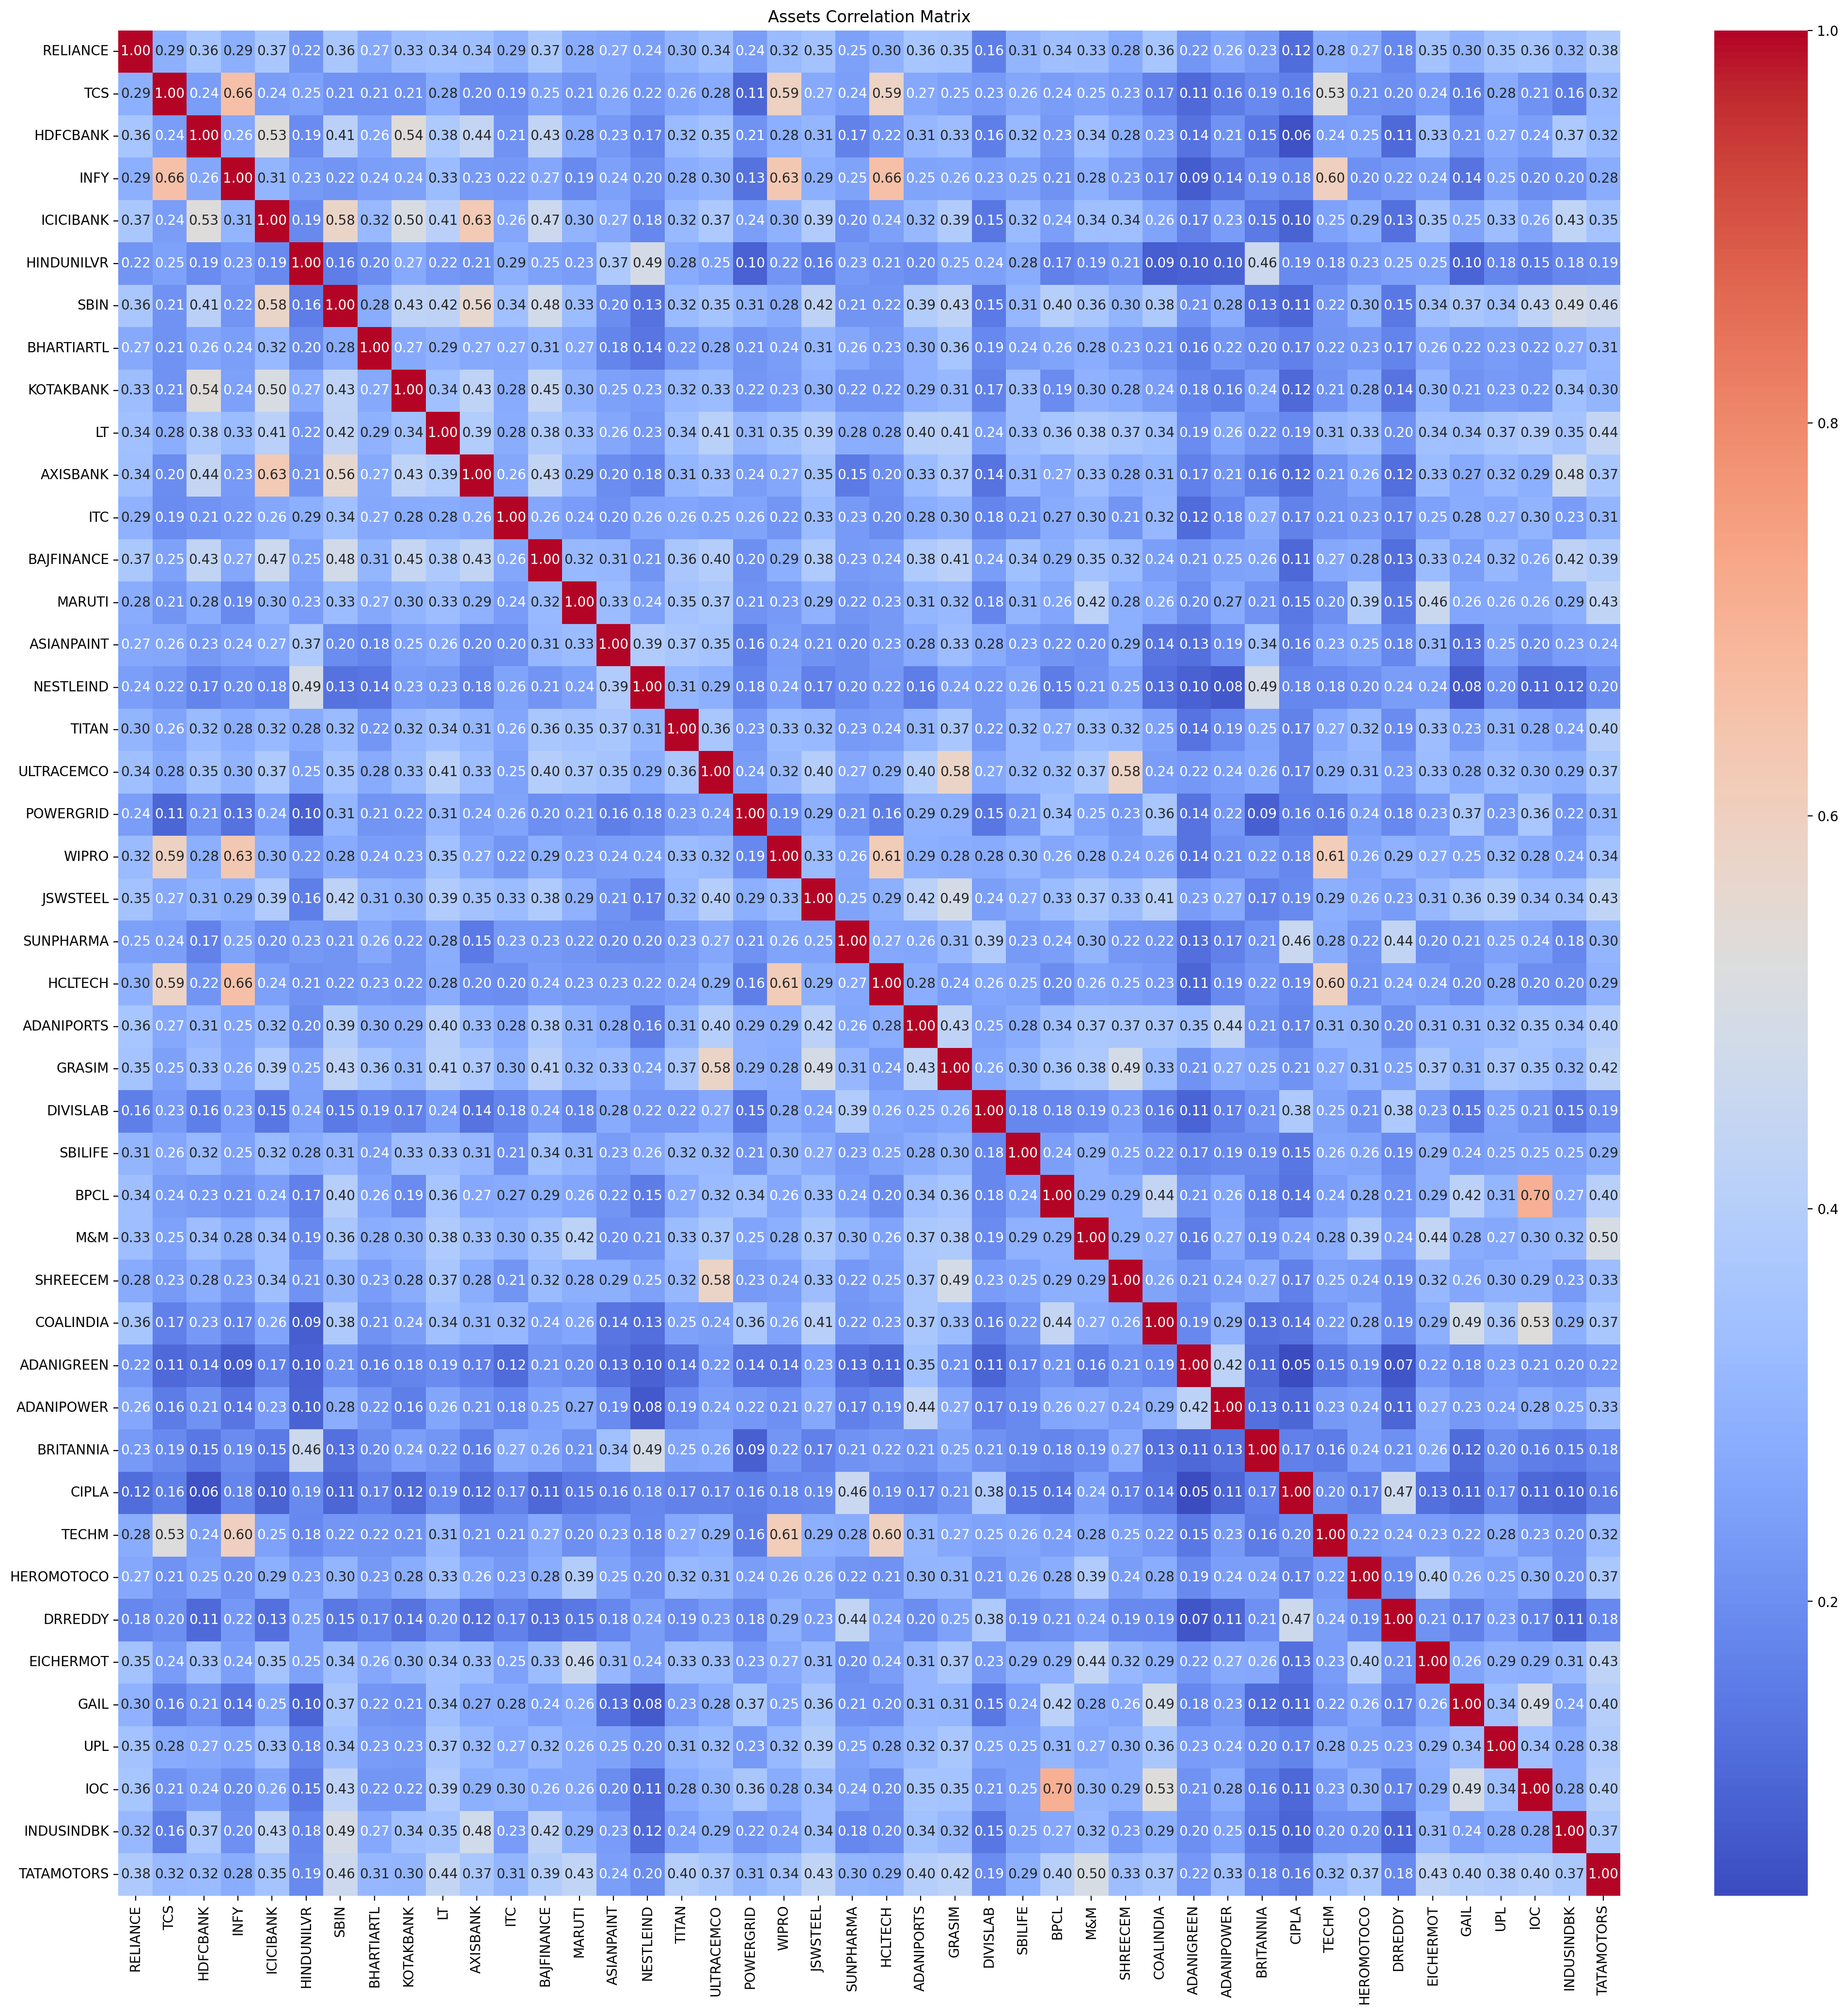

In [42]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(prices.pct_change().corr(method ='spearman'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
ax.set_title('Assets Correlation Matrix') 

In [43]:
# Load market cap data
mcap = pd.read_csv("mcap.csv")
mcap["Tickers"] = mcap["Tickers"].str.replace(".NS", "", regex=False)  

# Drop NaN market cap values
mcap = mcap.dropna(subset=["MarketCap"])

# Create market capitalization dictionary
mcap_dict = dict(zip(mcap["Tickers"], mcap["MarketCap"]))
print("Fixed Market Cap Dictionary:", mcap_dict.keys())

# Load price data
prices = pd.read_csv("prices.csv", index_col=0, parse_dates=True)

# Ensure tickers match 
valid_tickers = list(set(mcap_dict.keys()) & set(prices.columns))
prices = prices[valid_tickers]  
mcap_dict = {ticker: mcap_dict[ticker] for ticker in valid_tickers} 

print(f"Matching Tickers Count: {len(valid_tickers)}")

# Compute covariance matrix using Ledoit-Wolf shrinkage
S = pyp.risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# Ensure mcap_dict is aligned with covariance matrix
mcap_series = pd.Series(mcap_dict)
mcap_series = mcap_series.reindex(S.index)  

# Compute market-implied risk aversion
risk_free_rate = 0.05796
delta = pyp.black_litterman.market_implied_risk_aversion(prices, risk_free_rate)
print("Market Implied Risk Aversion:", delta)

# Compute market-implied prior returns
market_prior = pyp.black_litterman.market_implied_prior_returns(mcap_series, delta, S)
market_prior.name = "Prior"
print("Market Implied Prior Returns:\n", market_prior)

Fixed Market Cap Dictionary: dict_keys(['RELIANCE', 'TCS', 'HDFCBANK', 'INFY', 'ICICIBANK', 'HINDUNILVR', 'SBIN', 'BHARTIARTL', 'KOTAKBANK', 'LT', 'AXISBANK', 'ITC', 'BAJFINANCE', 'MARUTI', 'ASIANPAINT', 'NESTLEIND', 'TITAN', 'ULTRACEMCO', 'POWERGRID', 'WIPRO', 'JSWSTEEL', 'SUNPHARMA', 'HCLTECH', 'ADANIPORTS', 'GRASIM', 'DIVISLAB', 'SBILIFE', 'BPCL', 'M&M', 'SHREECEM', 'COALINDIA', 'ADANIGREEN', 'ADANIPOWER', 'BRITANNIA', 'CIPLA', 'TECHM', 'HEROMOTOCO', 'DRREDDY', 'EICHERMOT', 'GAIL', 'UPL', 'IOC', 'INDUSINDBK', 'TATAMOTORS'])
Matching Tickers Count: 44
Market Implied Risk Aversion: TATAMOTORS    2.062047
INDUSINDBK    0.162812
JSWSTEEL      2.551495
SBIN          2.229349
HCLTECH       4.136364
HINDUNILVR    1.422735
WIPRO         2.681908
ASIANPAINT    1.340004
ULTRACEMCO    3.317865
CIPLA         3.674687
GRASIM        3.148052
SUNPHARMA     5.231991
DRREDDY       3.565178
SHREECEM      1.106341
HDFCBANK      1.509207
NESTLEIND     2.260759
IOC           2.554410
ICICIBANK     2.331

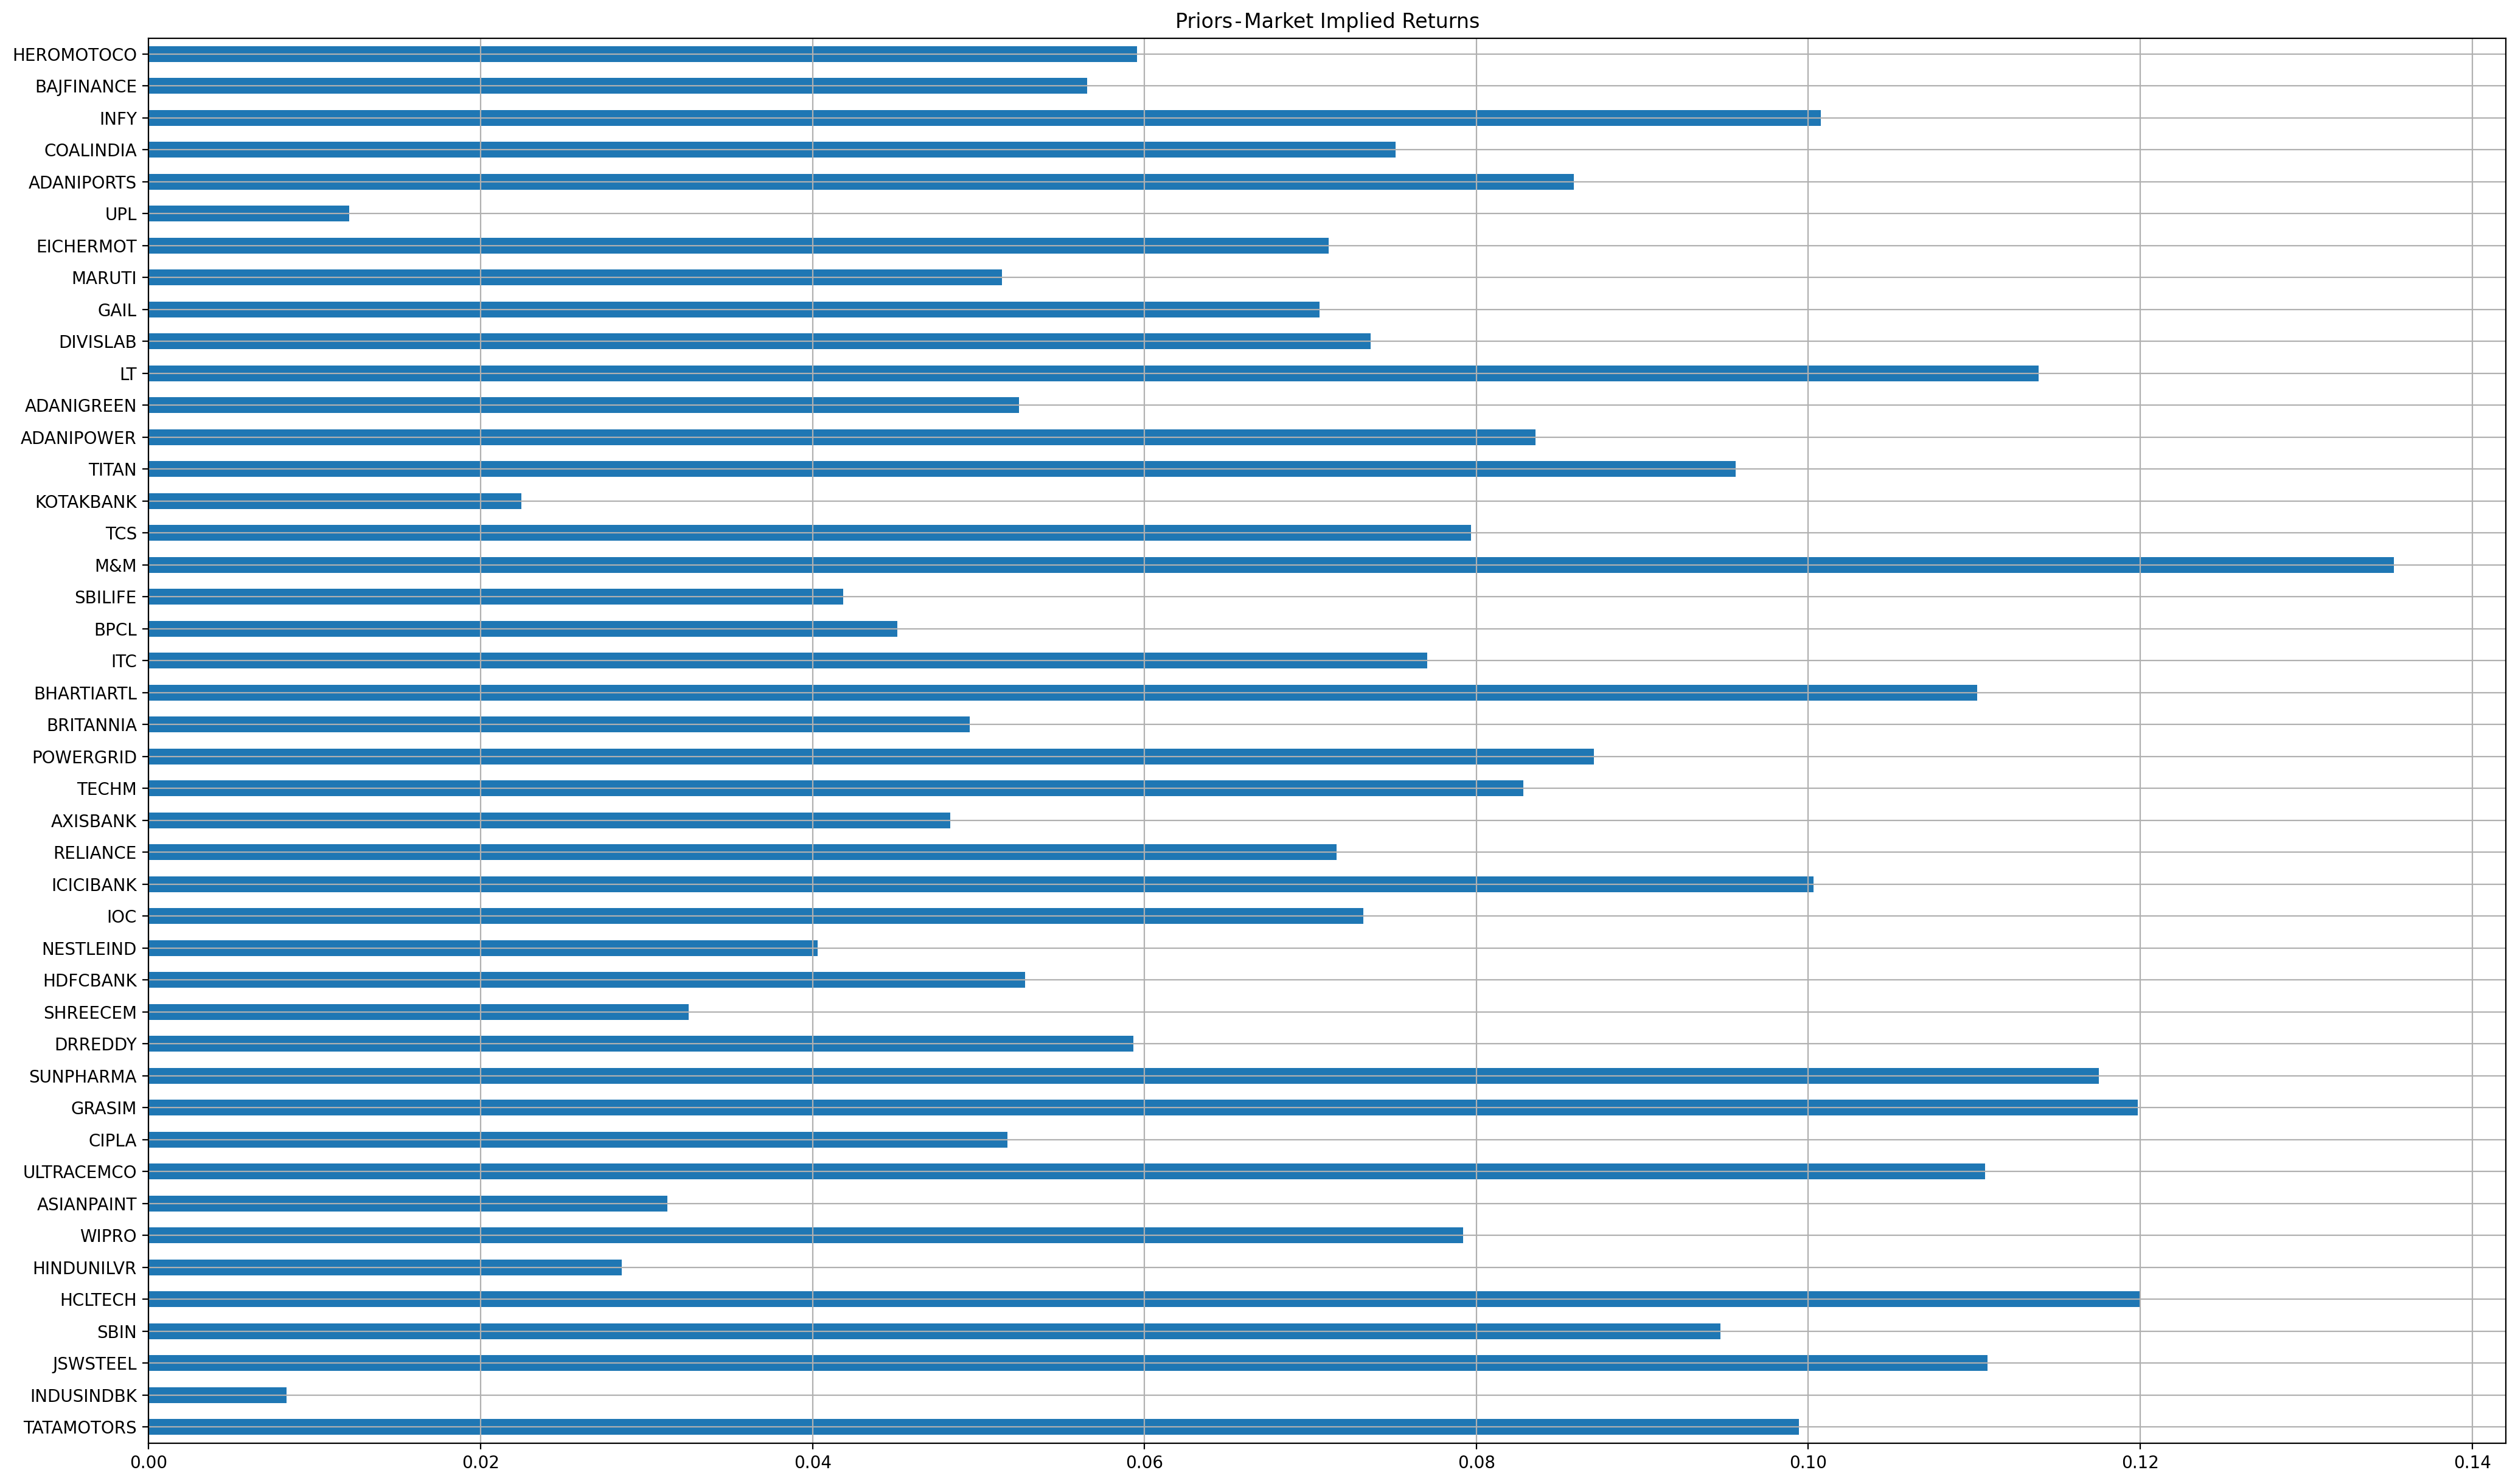

In [44]:
# plot prior
market_prior.plot.barh(figsize=(25, 15), title = 'Priors - Market Implied Returns',grid=True);

In [45]:
# provide absolute views - read csv
view_confidence = pd.read_csv('views_finetuned.csv', index_col=[0])
view_confidence.head(50)

,View,Confidence
Stock,,
RELIANCE,0.1444,0.68
TCS,0.1544,0.78
HDFCBANK,0.1172,0.73
INFY,0.2317,0.72
ICICIBANK,0.2150,0.65
HINDUNILVR,0.0863,0.79
SBIN,0.2237,0.62
BHARTIARTL,0.2832,0.71
KOTAKBANK,0.0621,0.69


In [46]:
# create view dict
views_dict = {ind : view_confidence['View'][ind] for ind in view_confidence.index}
print(views_dict)

{'RELIANCE': np.float64(0.1444), 'TCS': np.float64(0.1544), 'HDFCBANK': np.float64(0.1172), 'INFY': np.float64(0.2317), 'ICICIBANK': np.float64(0.215), 'HINDUNILVR': np.float64(0.0863), 'SBIN': np.float64(0.2237), 'BHARTIARTL': np.float64(0.2832), 'KOTAKBANK': np.float64(0.0621), 'LT': np.float64(0.2454), 'AXISBANK': np.float64(0.1461), 'ITC': np.float64(0.199), 'BAJFINANCE': np.float64(0.1548), 'MARUTI': np.float64(0.139), 'ASIANPAINT': np.float64(0.0964), 'NESTLEIND': np.float64(0.1188), 'TITAN': np.float64(0.2376), 'ULTRACEMCO': np.float64(0.2339), 'POWERGRID': np.float64(0.2924), 'WIPRO': np.float64(0.2095), 'JSWSTEEL': np.float64(0.3067), 'SUNPHARMA': np.float64(0.3224), 'HCLTECH': np.float64(0.2992), 'ADANIPORTS': np.float64(0.3158), 'GRASIM': np.float64(0.275), 'DIVISLAB': np.float64(0.2781), 'SBILIFE': np.float64(0.1181), 'BPCL': np.float64(0.1313), 'M&M': np.float64(0.4), 'SHREECEM': np.float64(0.0991), 'COALINDIA': np.float64(0.2597), 'ADANIGREEN': np.float64(0.4922), 'ADANIP

### Run the BL Model

In [47]:
# run the Bl model
bl = pyp.BlackLittermanModel(S, pi=market_prior, absolute_views=views_dict)

In [48]:
# Posterior estimate of returns
bl_return = bl.bl_returns()
bl_return.name = 'Posterior'

In [49]:
# get historical returns
mu = pyp.expected_returns.mean_historical_return(prices)
mu.name = 'Historical'

In [50]:
# create returns dataframe
returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(views_dict)], 
             index=['Prior', 'Historical','Posterior', 'Views']).T
print(returns_df)

               Prior  Historical  Posterior   Views
TATAMOTORS  0.099444    0.328863   0.310961  0.3542
INDUSINDBK  0.008315   -0.078389   0.117640  0.0454
JSWSTEEL    0.110813    0.299443   0.294079  0.3067
SBIN        0.094722    0.207695   0.226785  0.2237
HCLTECH     0.120007    0.322870   0.254638  0.2992
HINDUNILVR  0.028486    0.054963   0.090592  0.0863
WIPRO       0.079199    0.206234   0.204047  0.2095
ASIANPAINT  0.031236    0.058746   0.100712  0.0964
ULTRACEMCO  0.110656    0.240454   0.227849  0.2339
CIPLA       0.051755    0.278201   0.208072  0.2647
GRASIM      0.119856    0.281064   0.265146  0.2750
SUNPHARMA   0.117488    0.362977   0.276203  0.3224
DRREDDY     0.059321    0.221028   0.190635  0.2207
SHREECEM    0.032537    0.052913   0.131407  0.0991
HDFCBANK    0.052815    0.077777   0.125956  0.1172
NESTLEIND   0.040309    0.092855   0.109218  0.1188
IOC         0.073186    0.195974   0.198759  0.2027
ICICIBANK   0.100316    0.202279   0.205239  0.2150
RELIANCE    

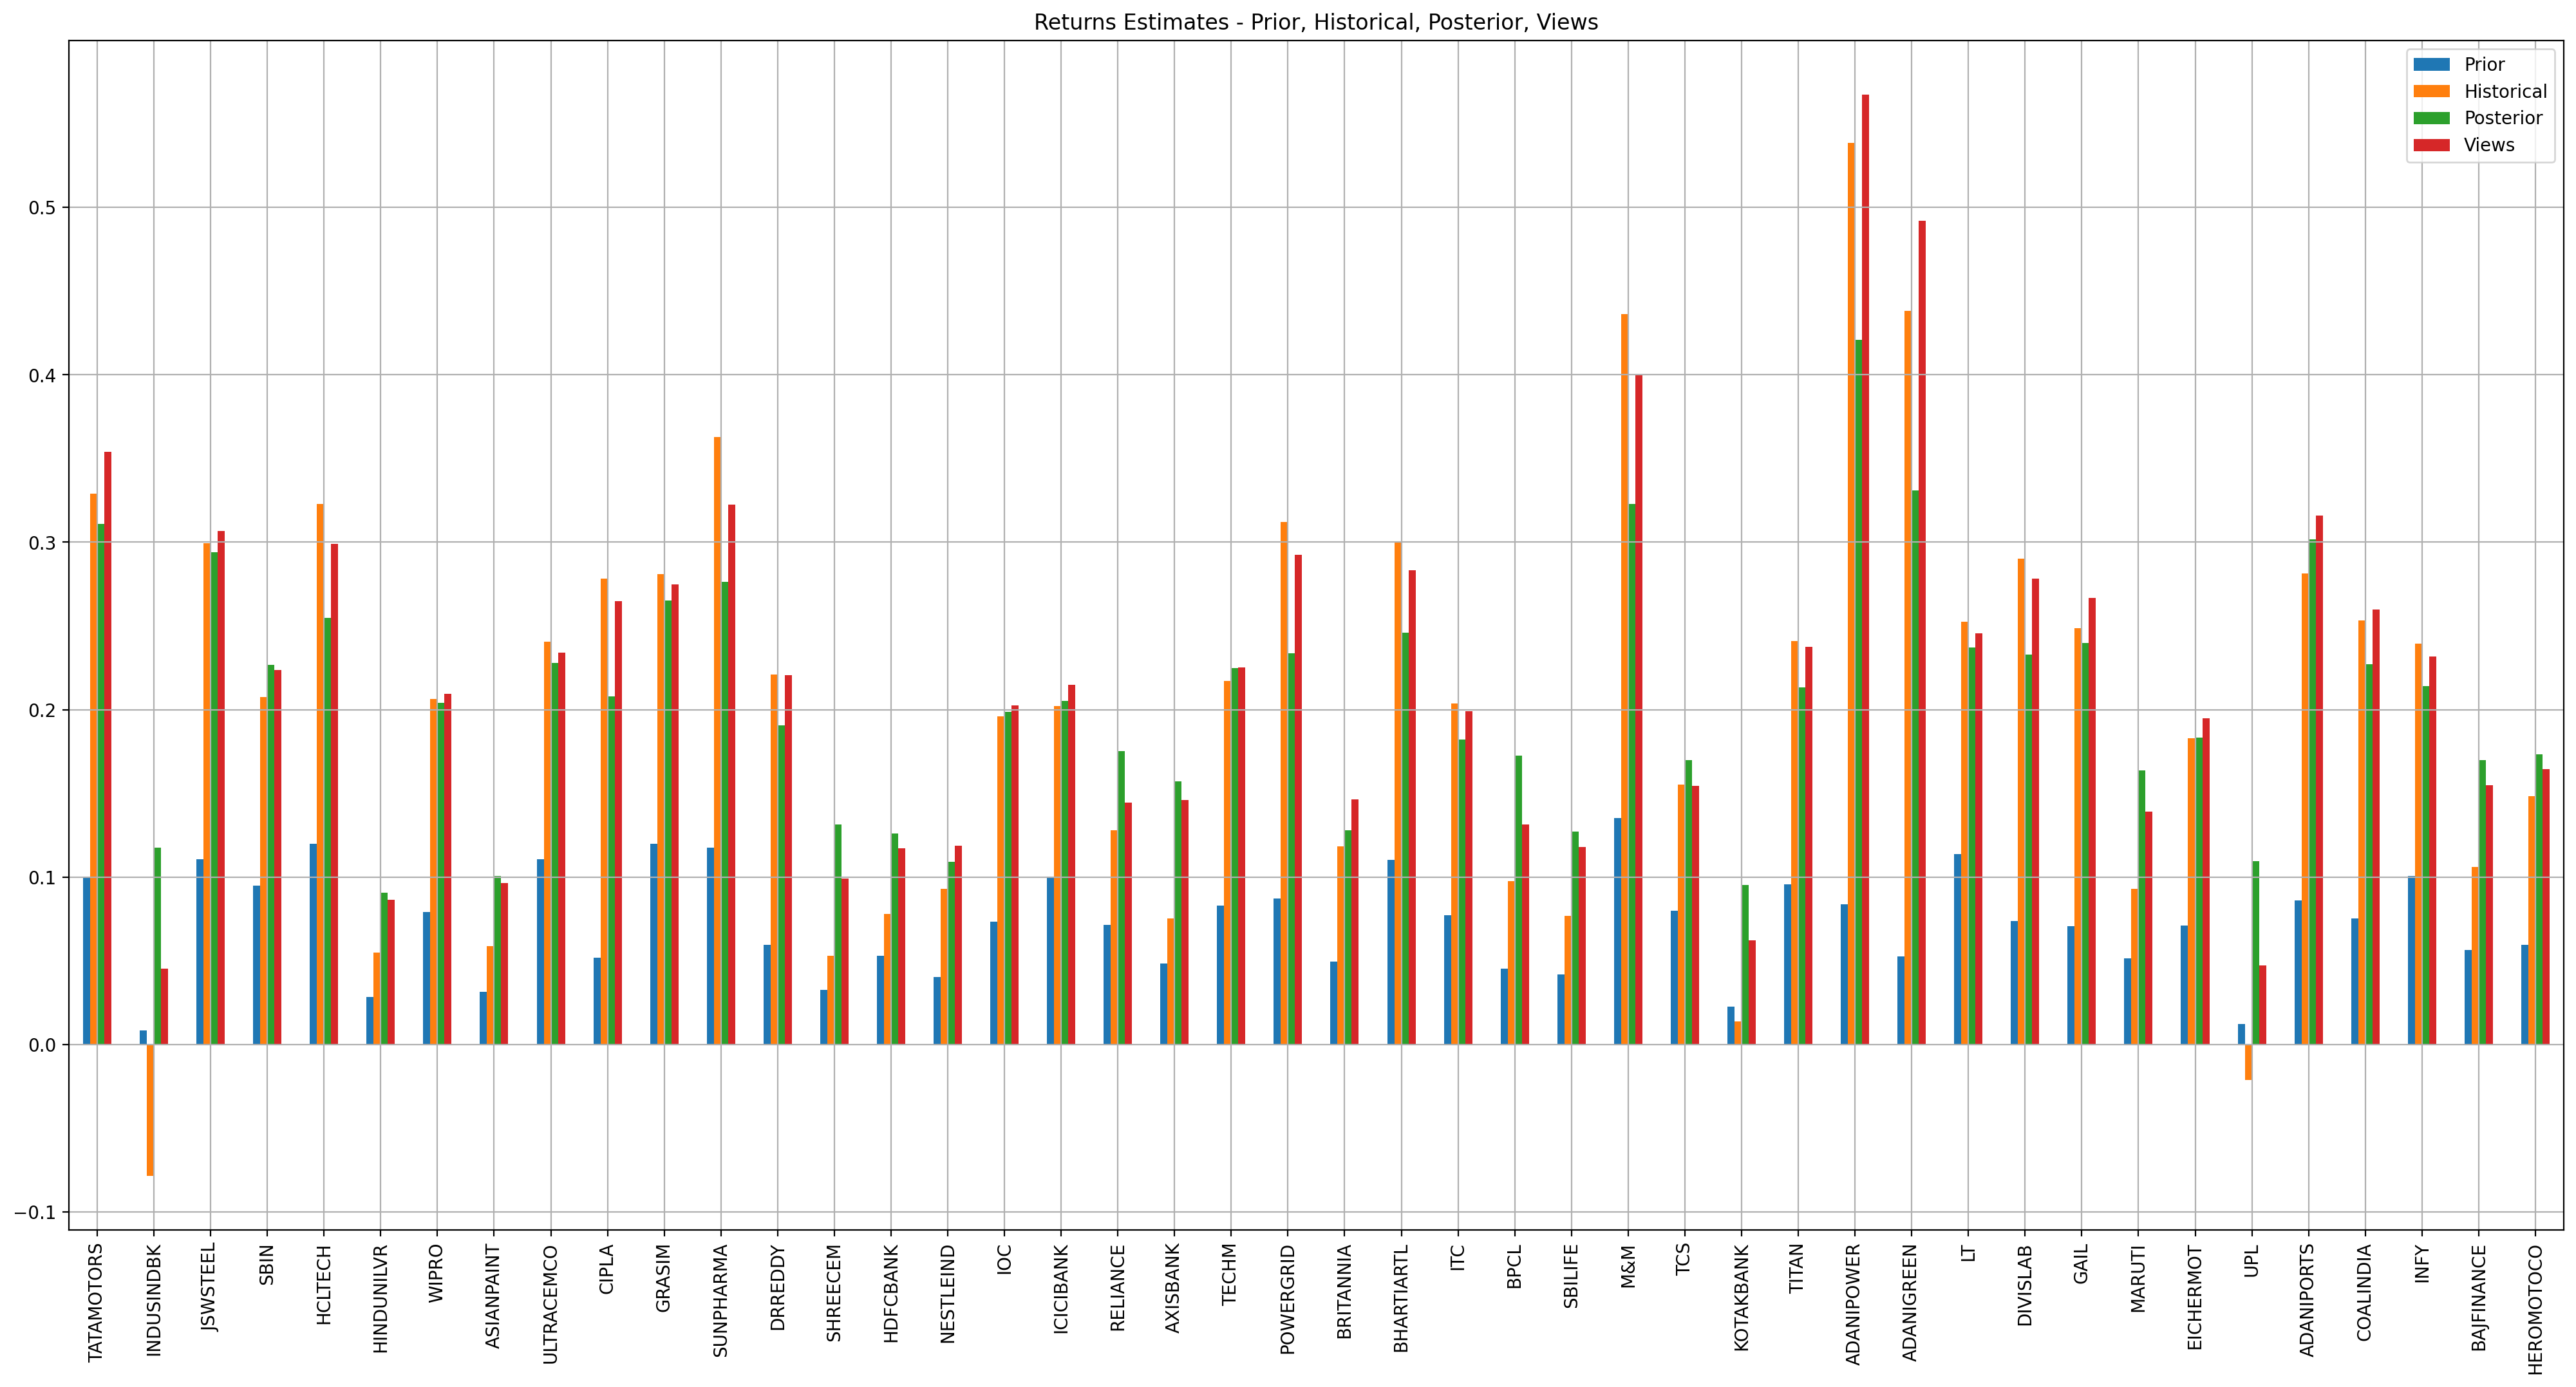

In [51]:
# plot the returns
returns_df.plot.bar(figsize=(25,12), title = 'Returns Estimates - Prior, Historical, Posterior, Views', grid=True);

In [58]:
# get the covariance matrix
S_bl = bl.bl_cov()

### Confidence matrix for analyst views

In [59]:
# create confidences vector
confidences = list(view_confidence.Confidence)
print(confidences)

[0.68, 0.78, 0.73, 0.72, 0.65, 0.79, 0.62, 0.71, 0.69, 0.7, 0.56, 0.75, 0.53, 0.68, 0.75, 0.82, 0.7, 0.72, 0.7, 0.69, 0.58, 0.76, 0.72, 0.5, 0.67, 0.69, 0.72, 0.61, 0.61, 0.7, 0.63, 0.5, 0.5, 0.78, 0.72, 0.66, 0.68, 0.76, 0.67, 0.57, 0.58, 0.69, 0.5, 0.5]


In [60]:
# use Idzorek's method and run the model
bl_confi = pyp.BlackLittermanModel(S, pi=market_prior, 
                                   absolute_views=views_dict, 
                                   omega="idzorek", view_confidences=confidences)

In [61]:
# Posterior estimate of returns
bl_return_confi = bl_confi.bl_returns()
bl_return_confi.name = 'Posterior_confidence'

In [62]:
returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(views_dict), bl_return_confi], 
             index=['Prior', 'Historical','Posterior', 'Views', 'Posterior_confidence']).T
print(returns_df)

               Prior  Historical  Posterior   Views  Posterior_confidence
TATAMOTORS  0.099444    0.328863   0.310961  0.3542              0.314654
INDUSINDBK  0.008315   -0.078389   0.117640  0.0454              0.119894
JSWSTEEL    0.110813    0.299443   0.294079  0.3067              0.300587
SBIN        0.094722    0.207695   0.226785  0.2237              0.226683
HCLTECH     0.120007    0.322870   0.254638  0.2992              0.270586
HINDUNILVR  0.028486    0.054963   0.090592  0.0863              0.089777
WIPRO       0.079199    0.206234   0.204047  0.2095              0.208793
ASIANPAINT  0.031236    0.058746   0.100712  0.0964              0.098662
ULTRACEMCO  0.110656    0.240454   0.227849  0.2339              0.228508
CIPLA       0.051755    0.278201   0.208072  0.2647              0.237241
GRASIM      0.119856    0.281064   0.265146  0.2750              0.269869
SUNPHARMA   0.117488    0.362977   0.276203  0.3224              0.301908
DRREDDY     0.059321    0.221028   0.1

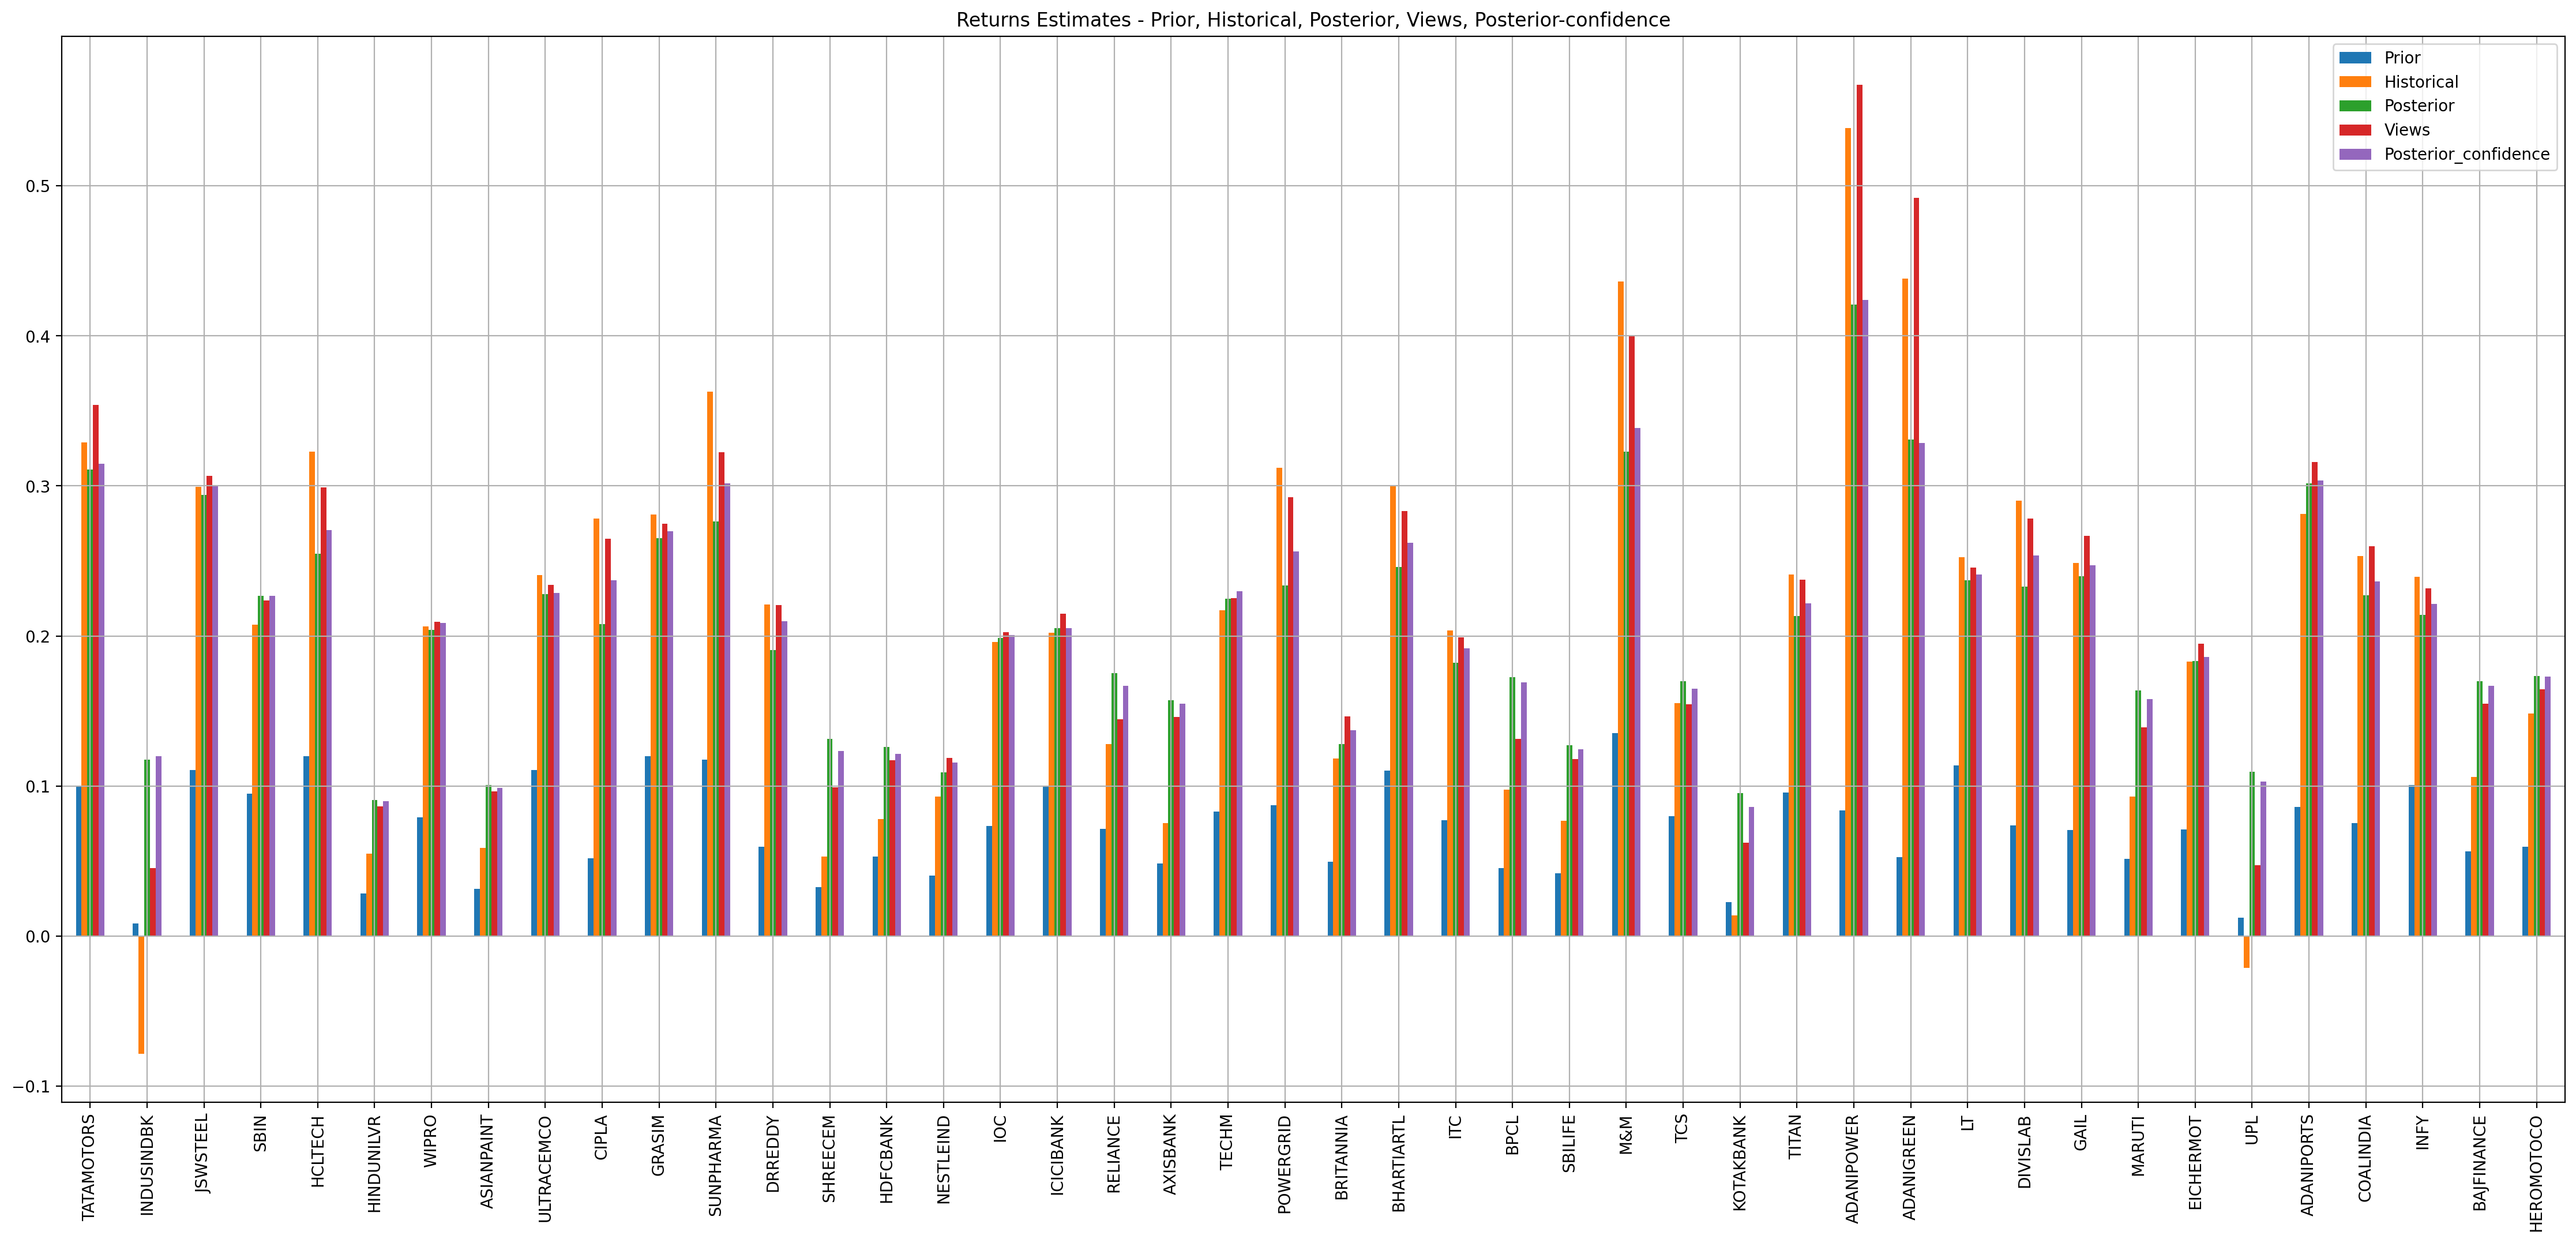

In [63]:
returns_df.plot.bar(figsize=(28,12), 
                    title = 'Returns Estimates - Prior, Historical, Posterior, Views, Posterior-confidence', grid=True);

In [64]:
# get the covariance matrix
S_bl_confi = bl_confi.bl_cov()
S_bl_confi

,TATAMOTORS,INDUSINDBK,JSWSTEEL,SBIN,HCLTECH,HINDUNILVR,WIPRO,ASIANPAINT,ULTRACEMCO,CIPLA,...,DIVISLAB,GAIL,MARUTI,EICHERMOT,UPL,ADANIPORTS,COALINDIA,INFY,BAJFINANCE,HEROMOTOCO
TATAMOTORS,0.182167,0.073393,0.070922,0.068150,0.040459,0.017361,0.041300,0.026476,0.047961,0.015791,...,0.026545,0.059174,0.058749,0.052126,0.058578,0.064995,0.050321,0.036637,0.070056,0.049443
INDUSINDBK,0.073393,0.247850,0.068368,0.079107,0.029658,0.030243,0.034116,0.034030,0.046016,0.015359,...,0.023256,0.044742,0.049447,0.052607,0.057573,0.064769,0.041535,0.038833,0.094831,0.047396
JSWSTEEL,0.070922,0.068368,0.129226,0.057610,0.035750,0.019014,0.036531,0.026236,0.047658,0.021254,...,0.033437,0.053999,0.043888,0.041206,0.054695,0.062120,0.049959,0.036098,0.060704,0.036715
SBIN,0.068150,0.079107,0.057610,0.110588,0.023519,0.014328,0.027589,0.019984,0.042245,0.010884,...,0.019847,0.050359,0.040836,0.039584,0.042227,0.063863,0.045210,0.025445,0.067191,0.031526
HCLTECH,0.040459,0.029658,0.035750,0.023519,0.078683,0.019947,0.048167,0.019334,0.027397,0.014834,...,0.024093,0.026259,0.026181,0.022742,0.035631,0.031882,0.024394,0.051691,0.028793,0.022901
HINDUNILVR,0.017361,0.030243,0.019014,0.014328,0.019947,0.059752,0.019577,0.027660,0.021926,0.011393,...,0.018567,0.010509,0.022969,0.019010,0.020373,0.018473,0.007230,0.021274,0.025615,0.019641
WIPRO,0.041300,0.034116,0.036531,0.027589,0.048167,0.019577,0.087437,0.019354,0.028018,0.015850,...,0.024056,0.029027,0.023724,0.021917,0.034068,0.030748,0.026468,0.049675,0.030836,0.026027
ASIANPAINT,0.026476,0.034030,0.026236,0.019984,0.019334,0.027660,0.019354,0.070129,0.030043,0.010987,...,0.022522,0.013035,0.031052,0.026711,0.029587,0.030784,0.011915,0.021010,0.035222,0.024194
ULTRACEMCO,0.047961,0.046016,0.047658,0.042245,0.027397,0.021926,0.028018,0.030043,0.078255,0.012317,...,0.024110,0.033750,0.038014,0.033502,0.036372,0.045559,0.024506,0.026046,0.046240,0.030725
CIPLA,0.015791,0.015359,0.021254,0.010884,0.014834,0.011393,0.015850,0.010987,0.012317,0.079054,...,0.031848,0.012337,0.013661,0.008329,0.016422,0.014873,0.013088,0.015256,0.010081,0.014318


### Portfolio weights

In [65]:
ef = pyp.EfficientFrontier(bl_return_confi, S_bl_confi, weight_bounds=(0, 0.1))

# Add L2 regularization with gamma=0.1
ef.add_objective(pyp.objective_functions.L2_reg, gamma=0.1)

# Optimize for Minimum Volatility
weights = ef.min_volatility()

# Print portfolio performance
ef.portfolio_performance(verbose=True)
print('\n')

# Convert weights to percentage format
wt_min_vola = pd.DataFrame([weights], columns=weights.keys()).T * 100
wt_min_vola.to_csv("metrics.csv")
wt_min_vola = pd.read_csv("metrics.csv", index_col=[0])

print("Weights in Percentage ")
print(wt_min_vola.round(4))

Expected annual return: 19.0%
Annual volatility: 14.9%
Sharpe Ratio: 1.27


Weights in Percentage 
                 0
TATAMOTORS  0.0000
INDUSINDBK  0.0000
JSWSTEEL    0.0000
SBIN        0.0000
HCLTECH     2.5227
HINDUNILVR  5.6550
WIPRO       1.9094
ASIANPAINT  4.5556
ULTRACEMCO  0.6335
CIPLA       6.8635
GRASIM      0.0000
SUNPHARMA   4.3207
DRREDDY     5.8458
SHREECEM    2.3937
HDFCBANK    3.7468
NESTLEIND   6.8464
IOC         3.2649
ICICIBANK   0.0000
RELIANCE    0.5815
AXISBANK    0.0000
TECHM       0.2435
POWERGRID   5.6219
BRITANNIA   5.3704
BHARTIARTL  3.9761
ITC         5.7852
BPCL        0.0000
SBILIFE     2.9340
M&M         0.0000
TCS         5.1091
KOTAKBANK   2.1845
TITAN       1.8975
ADANIPOWER  0.0000
ADANIGREEN  2.0052
LT          0.8582
DIVISLAB    3.3656
GAIL        1.0389
MARUTI      0.7021
EICHERMOT   2.3130
UPL         0.0000
ADANIPORTS  0.0000
COALINDIA   2.9947
INFY        2.4474
BAJFINANCE  0.0000
HEROMOTOCO  2.0130


Text(0, 0.5, 'Percentage')

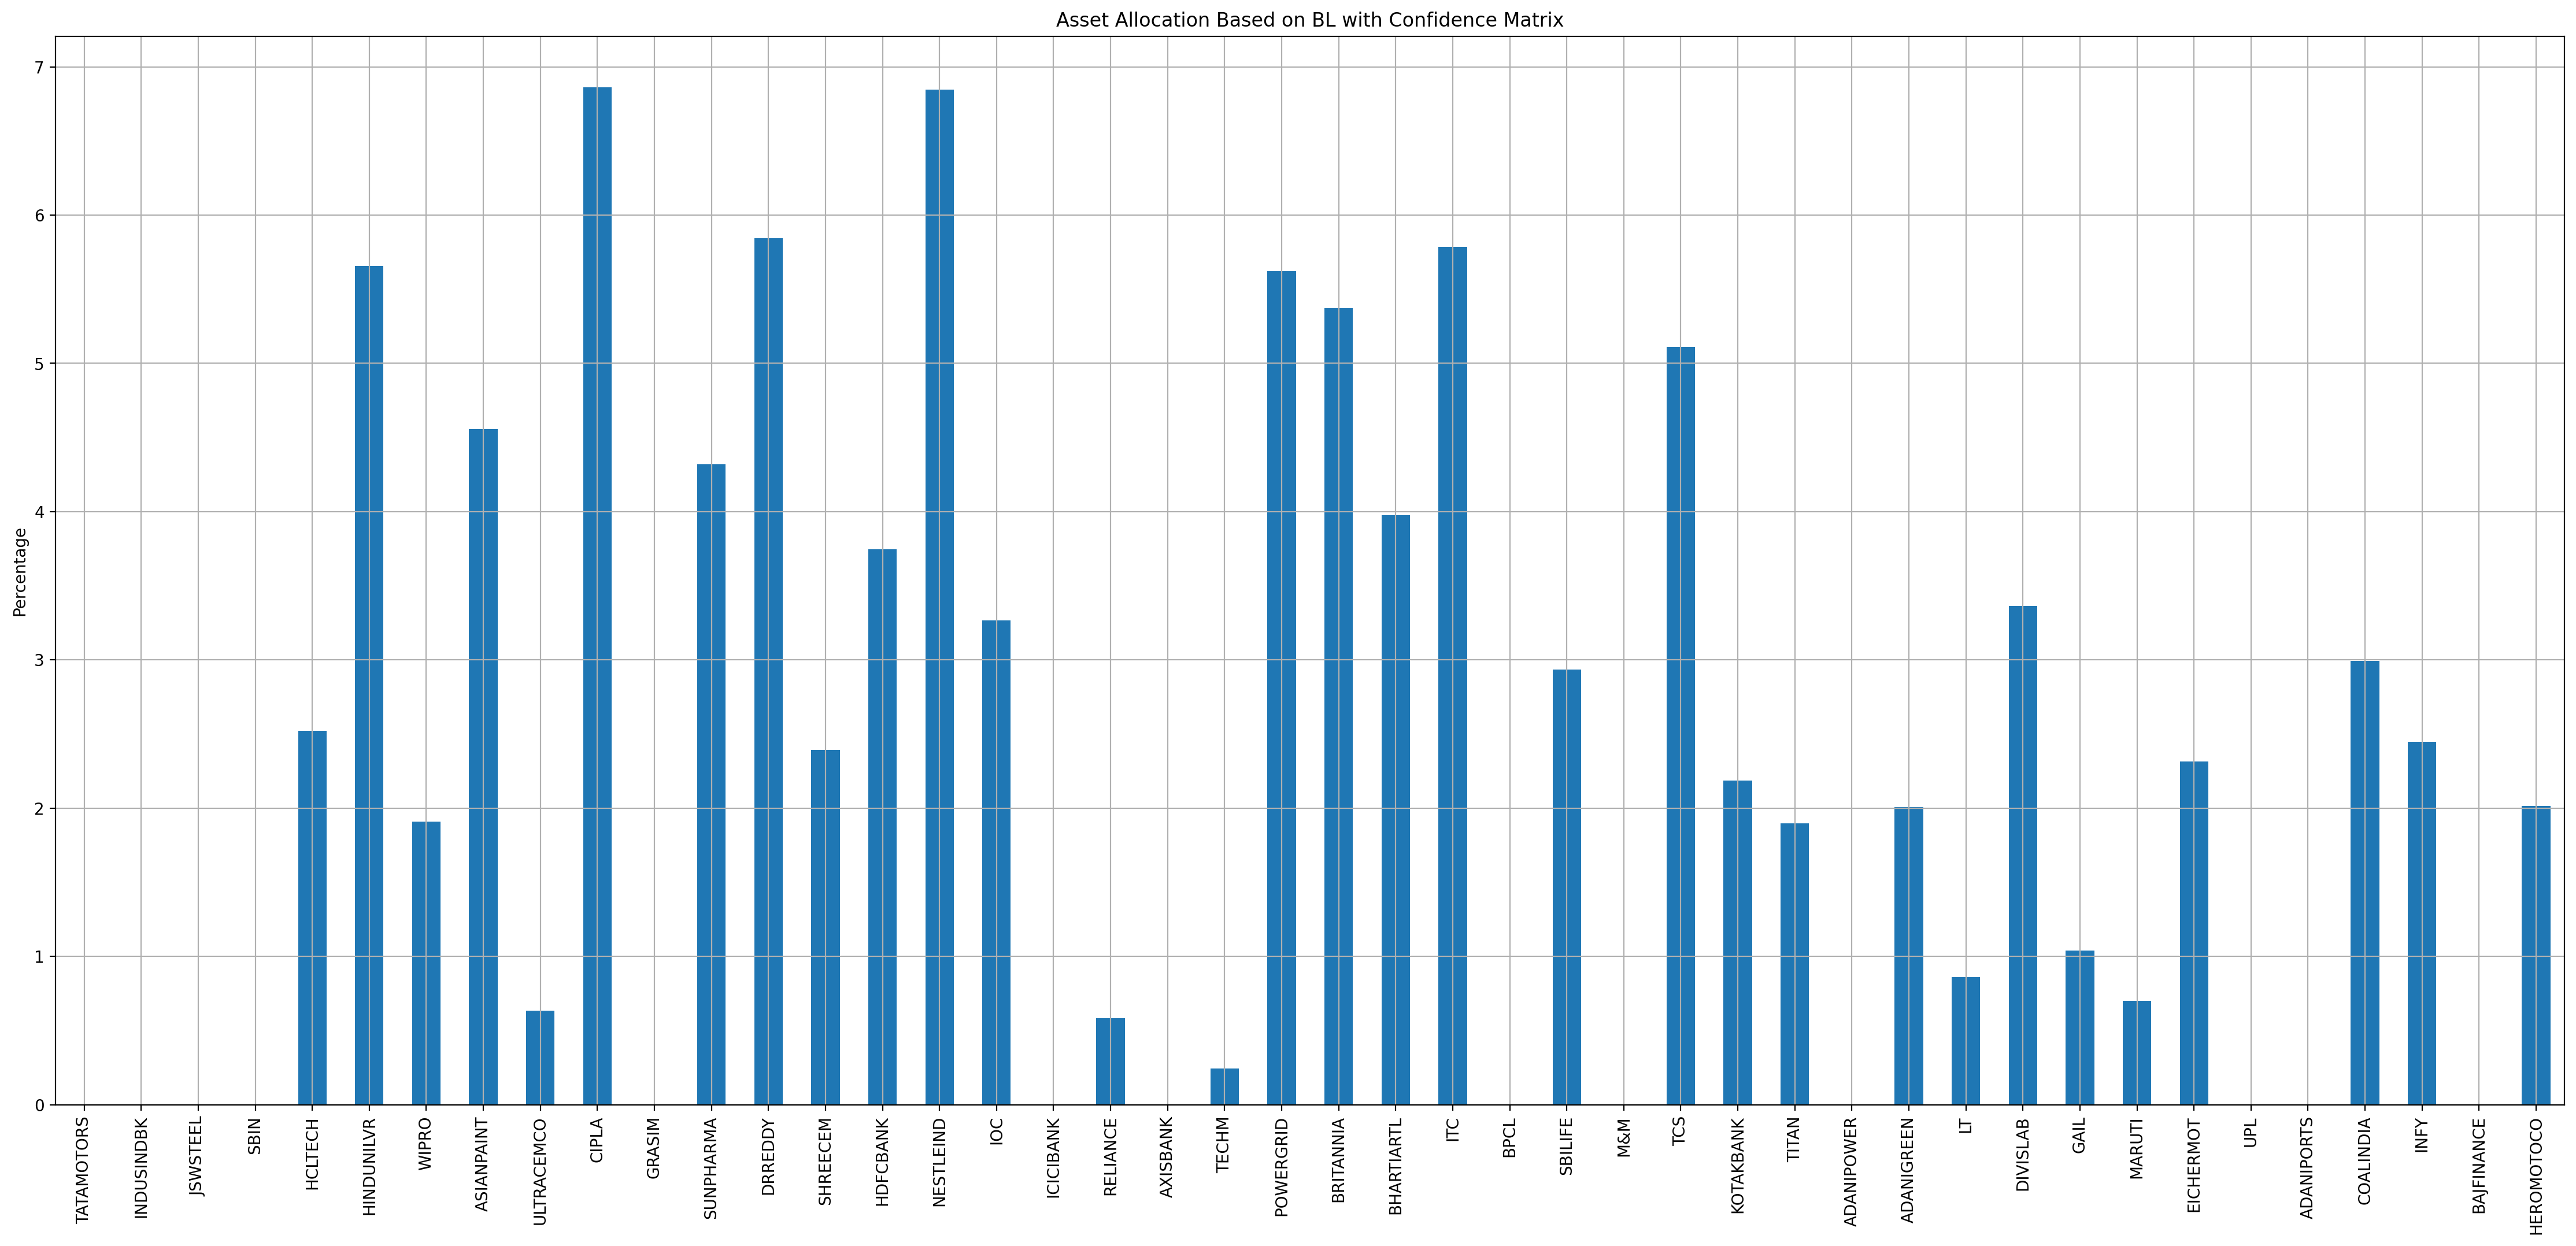

In [66]:
# plot the weights
wt_min_vola.plot.bar(figsize=(28,12), 
                    title = 'Asset Allocation Based on BL with Confidence Matrix', grid=True,legend=False);
plt.ylabel('Percentage')

In [67]:
# Key Performance Metrics
weights_series = pd.Series(weights)  
weights_series = weights_series.reindex(prices.columns).fillna(0)

daily_returns = prices.pct_change().mul(weights_series, axis=1).sum(axis=1)
daily_returns.dropna(inplace=True)

def max_drawdown(return_series):
    cum_returns = (1 + return_series).cumprod()
    running_max = cum_returns.cummax()
    drawdown = (cum_returns - running_max) / running_max
    return drawdown.min()  # negative value

# Calculate Benchmark Metrics
portfolio_volatility = daily_returns.std() * np.sqrt(252)  
expected_return_annual = daily_returns.mean() * 252        
mdd_portfolio = max_drawdown(daily_returns)

print("\n Portfolio Performance")
print(f"Annualized Volatility: {portfolio_volatility:.2%}")
print(f"Expected Annual Return: {expected_return_annual:.2%}")
print(f"Max Drawdown: {mdd_portfolio:.2%}")

# Compare vs. Market Benchmark (NSEI)
benchmark_returns = market_prices.pct_change().dropna()
common_idx = daily_returns.index.intersection(benchmark_returns.index)
portfolio_aligned = daily_returns.loc[common_idx]
benchmark_aligned = benchmark_returns.loc[common_idx]

# Calculate Benchmark Metrics
bench_volatility = benchmark_aligned.std() * np.sqrt(252)
bench_return_annual = benchmark_aligned.mean() * 252
bench_mdd = max_drawdown(benchmark_aligned)

daily_returns.index = daily_returns.index.tz_localize(None)
benchmark_returns.index = benchmark_returns.index.tz_localize(None)
# Just the 'Close' column for NIFTY
benchmark_data = yf.download("^NSEI", start="2020-01-01", end="2024-12-31")
benchmark_returns = benchmark_data["Close"].pct_change().dropna()

# Align with portfolio
common_idx = daily_returns.index.intersection(benchmark_returns.index)
portfolio_aligned = daily_returns.loc[common_idx]
benchmark_aligned = benchmark_returns.loc[common_idx]

def max_drawdown(return_series):
    cum_returns = (1 + return_series).cumprod()
    running_max = cum_returns.cummax()
    drawdown = (cum_returns - running_max) / running_max
    return drawdown.min()

benchmark_aligned = benchmark_aligned.squeeze()  
bench_volatility = benchmark_aligned.std() * np.sqrt(252)
bench_return_annual = benchmark_aligned.mean() * 252
bench_mdd = max_drawdown(benchmark_aligned)

print("\n Benchmark (NSEI)")
print(f"Annualized Volatility: {bench_volatility:.2%}")
print(f"Expected Annual Return: {bench_return_annual:.2%}")
print(f"Max Drawdown: {bench_mdd:.2%}")

[*********************100%***********************]  1 of 1 completed


 Portfolio Performance
Annualized Volatility: 15.05%
Expected Annual Return: 21.16%
Max Drawdown: -25.22%

 Benchmark (NSEI)
Annualized Volatility: 19.12%
Expected Annual Return: 15.38%
Max Drawdown: -38.44%


## Sensitivity Analysis 

In [68]:
# Approach 2
view_confidence = pd.read_csv('views.csv', index_col=[0])
view_confidence.head(50)

# create view dict
views_dict = {ind : view_confidence['View'][ind] for ind in view_confidence.index}

# run the Bl model
bl = pyp.BlackLittermanModel(S, pi=market_prior, absolute_views=views_dict)

# Posterior estimate of returns
bl_return = bl.bl_returns()
bl_return.name = 'Posterior'

# get historical returns
mu = pyp.expected_returns.mean_historical_return(prices)
mu.name = 'Historical'

# create returns dataframe
returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(views_dict)], 
             index=['Prior', 'Historical','Posterior', 'Views']).T

# get the covariance matrix
S_bl = bl.bl_cov()

# create confidences vector
confidences = list(view_confidence.Confidence)

# use Idzorek's method and run the model
bl_confi = pyp.BlackLittermanModel(S, pi=market_prior, 
                                   absolute_views=views_dict, 
                                   omega="idzorek", view_confidences=confidences)

# Posterior estimate of returns
bl_return_confi = bl_confi.bl_returns()
bl_return_confi.name = 'Posterior_confidence'

returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(views_dict), bl_return_confi], 
             index=['Prior', 'Historical','Posterior', 'Views', 'Posterior_confidence']).T

# get the covariance matrix
S_bl_confi = bl_confi.bl_cov()
S_bl_confi

# Portfolio weights
ef = pyp.EfficientFrontier(bl_return_confi, S_bl_confi, weight_bounds=(0, 0.1))

# Add L2 regularization with gamma=0.1
ef.add_objective(pyp.objective_functions.L2_reg, gamma=0.1)

# Optimize for Minimum Volatility
weights = ef.min_volatility()

# Print portfolio performance
ef.portfolio_performance(verbose=True)
print('\n')

Expected annual return: 9.7%
Annual volatility: 14.9%
Sharpe Ratio: 0.65


